<h1><i>E. coli</i> Co-evolution simulation </h1>
<h2> Using Dynamic Joint FBA (djFBA)

<h4>Following the settings and results from Zhang and Reed<sup>1</sup></h4>

In [54]:
import matplotlib.pyplot as plt
import numpy 

from dcFBA.Models import CommunityModel
from dcFBA.DynamicModels import DynamicJointFBA

from ecoli_models import (
    get_leucine_knock_out_model,
    get_lysine_knock_out_model,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the models

In [55]:
leucine_knock_out = get_leucine_knock_out_model()
lysine_knock_out = get_lysine_knock_out_model()

getState1
Model clone time: 15.451817989349365
getState1
Model clone time: 4.183587074279785


In [56]:
#Build the community model
community_model:CommunityModel = CommunityModel(
    [leucine_knock_out, lysine_knock_out],
    ["R_BIOMASS_Ec_iAF1260_core_59p81M", "R_BIOMASS_Ec_iAF1260_core_59p81M"],
    ["dleu", "dlys"],
)



Deleting reagent: R_2AGPG161tipp_M_2agpg161_c
Deleting reagent: R_2AGPGAT161_M_2agpg161_c
Deleting reagent: R_LPLIPAL2G161_M_2agpg161_c
Deleting reagent: R_LPLIPAL2ATG161_M_2agpg161_c
Deleting reagent: R_2AGPG161tipp_M_2agpg161_p
Deleting reagent: R_PLIPA1G161pp_M_2agpg161_p
Deleting reagent: R_2AGPG180tipp_M_2agpg180_c
Deleting reagent: R_2AGPGAT180_M_2agpg180_c
Deleting reagent: R_LPLIPAL2G180_M_2agpg180_c
Deleting reagent: R_LPLIPAL2ATG180_M_2agpg180_c
Deleting reagent: R_2AGPG180tipp_M_2agpg180_p
Deleting reagent: R_PLIPA1G180pp_M_2agpg180_p
Deleting reagent: R_2AGPG181tipp_M_2agpg181_c
Deleting reagent: R_2AGPGAT181_M_2agpg181_c
Deleting reagent: R_LPLIPAL2G181_M_2agpg181_c
Deleting reagent: R_LPLIPAL2ATG181_M_2agpg181_c
Deleting reagent: R_2AGPG181tipp_M_2agpg181_p
Deleting reagent: R_PLIPA1G181pp_M_2agpg181_p
Deleting reagent: R_ACHBS_M_2ahbut_c
Deleting reagent: R_KARA2_M_2ahbut_c
Deleting reagent: R_DSERDHr_M_2amsa_c
Deleting reagent: R_LSERDHr_M_2amsa_c
Deleting reagent: R_AO

In [57]:
#Set creation of the metabolites to zero
community_model.getReaction("R_IPPS_dleu").setUpperBound(0)
community_model.getReaction("R_DAPDC_dlys").setUpperBound(0)

#Restrict the uptake of glucose
community_model.getReaction("R_GLCtex_copy1_dleu").setUpperBound(10)
community_model.getReaction("R_GLCtex_copy2_dleu").setUpperBound(0)
community_model.getReaction("R_GLCtex_copy1_dlys").setUpperBound(10)
community_model.getReaction("R_GLCtex_copy2_dlys").setUpperBound(0)


#R_O2tex oxygen
community_model.getReaction("R_O2tex_dleu").setLowerBound(-15)
community_model.getReaction("R_O2tex_dlys").setLowerBound(-15)

community_model.getReaction("R_EX_o2_e").setLowerBound(-30) #could also be set to 2* 18.5
community_model.getReaction("R_EX_cbl1_e").setLowerBound(-0.02) #2 * initial value of 0.01


#R_FE3tex
community_model.getReaction("R_FE3tex_dleu").setUpperBound(0)
community_model.getReaction("R_FE3tex_dlys").setUpperBound(0)

#In the paper they forced that all Leucine and Lysine was consumed by the strains
#I.E. there can not be outflow of these metabolites or inflow
community_model.getReaction("R_EX_leu__L_e").setUpperBound(0)
community_model.getReaction("R_EX_lys__L_e").setUpperBound(0)

community_model.getReaction("R_EX_leu__L_e").setLowerBound(0)
community_model.getReaction("R_EX_lys__L_e").setLowerBound(0)



In [58]:
def stop (sim, used_time, run_condition):
    if sim.biomasses["dleu"][-1] + sim.biomasses["dlys"][-1] >= 0.083:
        #Stop the simulation by setting community reaction to zero, solution will be zero or nan
        sim.model.getReaction("X_comm").setUpperBound(0)

    return 0

<h2>Constrain release rates simulation </h2>

In [6]:
community_model.getReaction("R_LEUtex_dleu").setLowerBound(-1000)
community_model.getReaction("R_LEUtex_dleu").setUpperBound(1000)
community_model.getReaction("R_LYStex_dleu").setLowerBound(-0.056)
community_model.getReaction("R_LYStex_dleu").setUpperBound(-0.056)

community_model.getReaction("R_LYStex_dlys").setLowerBound(-1000)
community_model.getReaction("R_LYStex_dlys").setUpperBound(1000)
community_model.getReaction("R_LEUtex_dlys").setLowerBound(-0.086)
community_model.getReaction("R_LEUtex_dlys").setUpperBound(-0.086)

In [7]:
dj_release = DynamicJointFBA(
    community_model,
    [0.0027, 0.0027],
    {"M_glc__D_e": 11.96 , "M_leu__L_e": 0, "M_lys__L_e": 0},
)


getState1
Model clone time: 28.772770643234253

Reaction "X_comm" bounds set to: -INF <= X_comm <= INF
Add reagents with cmod.createReactionReagent(X_comm, metabolite, coefficient)
Adding objective: X_comm_objective
Objective X_comm_objective (idx=0) set active


In [8]:
dj_release.simulate(0.1, epsilon=0.00001, deviate=stop)

Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.11027407646179199


cplx_analyzeModel FBA --> LP time: 0.11097407341003418

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 8 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 6 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 674 rows and 1325 columns.
Aggregator did 1931 substitutions.
Reduced LP has 433 rows, 1210 columns, and 6202 nonzeros.
Presolve time = 0.01 sec. (7.49 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Scaled dual infeas =             1.000000
Iteration:    51   Dual objective     =             0.000956
Iteration:   112   Dual objective     =             0.000956
Perturbation started.
Iteration:   152   Dual objective     =             0.000956
Iteration:   218

CPLEX Error  1217: No solution exists.


INFO: Model is infeasible: 3
CPLEX Error  1217: No solution exists.
No solution available (status=infeasible) type: 0
Status: LPS_NONE
No solution available (status=infeasible) type: 0
No solution available (status=infeasible) type: 0

analyzeModel objective value: nan



In [21]:
# Uncomment code if you do not want to wait half an hour 


# import pickle

# with open("../../output/djFBA/release/constrained_model.pkl", "rb") as file:
#     dj_release_test = pickle.load(file)


In [24]:
metabolites = dj_release.get_metabolites()
biomasses = dj_release.get_biomasses()
time_points = dj_release.get_time_points()

<h3>Plot biomasses </h3>

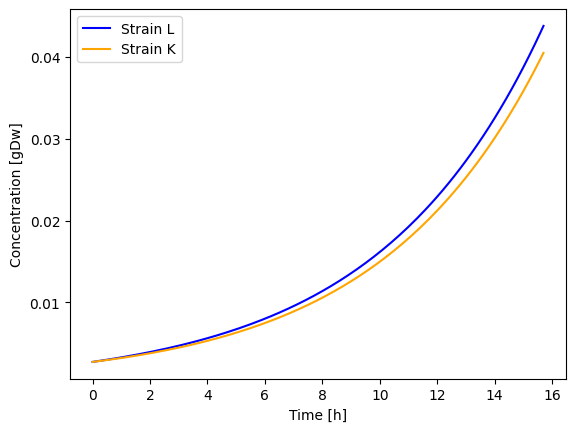

In [25]:
plt.plot(time_points, biomasses["dleu"], color="blue", label="Strain L")
plt.plot(time_points, biomasses["dlys"], color="orange", label="Strain K")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [gDw]")
plt.legend()
plt.show()


<h3>Glucose concentration </h3>

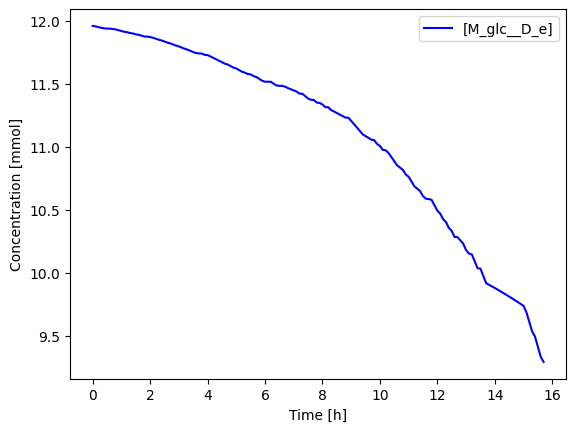

In [26]:
plt.plot(time_points, metabolites["M_glc__D_e"], color="blue", label = "[M_glc__D_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
plt.legend()


<h3>Specific fluxes Leucine and Lysine uptake </h3>

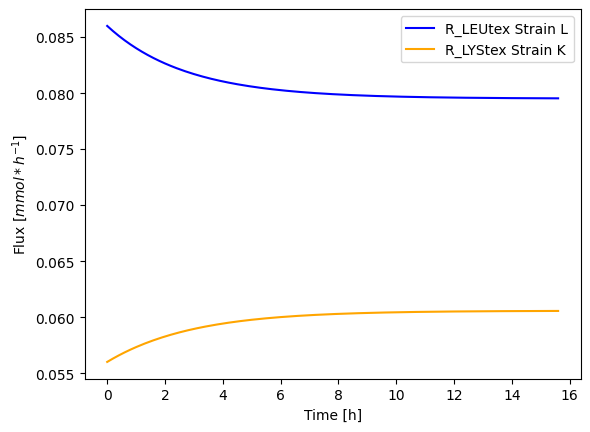

In [27]:
ls1 = dj_release.get_specific_flux_values("R_LEUtex_dleu") 
ls2 = dj_release.get_specific_flux_values("R_LYStex_dlys") 
plt.plot(time_points[:-1], ls1, color="blue", label=f"R_LEUtex Strain L")
plt.plot(time_points[:-1], ls2, color=f"Orange", label=f"R_LYStex Strain K")
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} * h^{-1}$]')
plt.legend()

<h3> Glucose specific flux

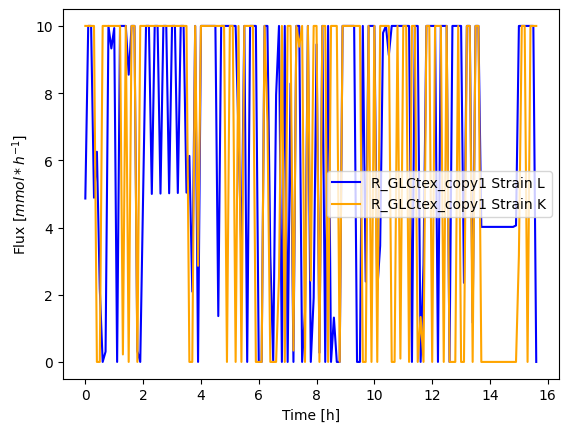

In [53]:
ls1 = dj_release.get_specific_flux_values("R_GLCtex_copy1_dleu") 
ls2 = dj_release.get_specific_flux_values("R_GLCtex_copy1_dlys") 

plt.plot(time_points[:-1], ls1, color="blue", label=f"R_GLCtex_copy1 Strain L")
plt.plot(time_points[:-1], ls2, color=f"Orange", label=f"R_GLCtex_copy1 Strain K")
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} * h^{-1}$]')
plt.legend()

<h3> Valine Specific Flux and Exchange

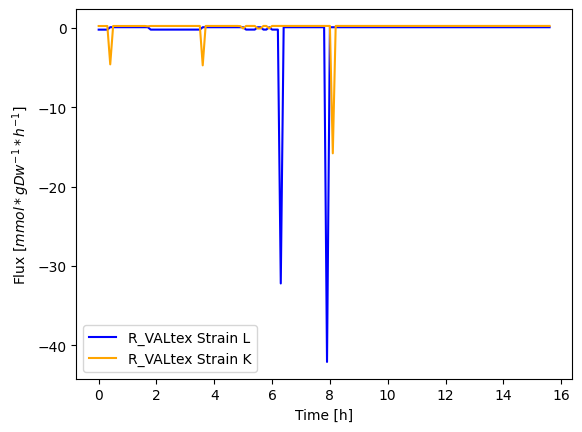

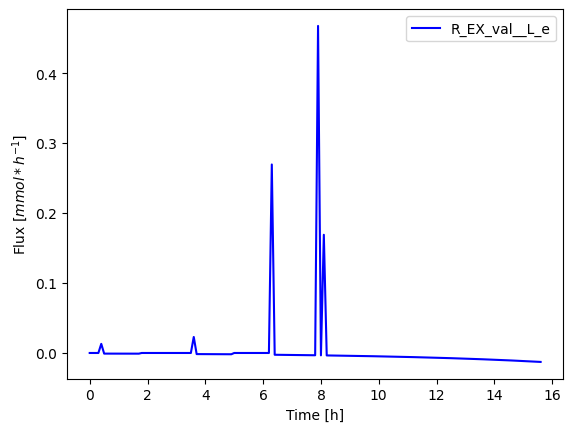

In [30]:
ls1 = dj_release.get_specific_flux_values("R_VALtex_dleu") 
ls2 = dj_release.get_specific_flux_values("R_VALtex_dlys") 

plt.plot(time_points[:-1], ls1, color="blue", label=f"R_VALtex Strain L")
plt.plot(time_points[:-1], ls2, color=f"Orange", label=f"R_VALtex Strain K")
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} * h^{-1}$]')
plt.legend()
plt.show()
ls3 = dj_release.get_flux_values("R_EX_val__L_e")
plt.plot(time_points[:-1], ls3, color="blue", label=f"R_EX_val__L_e")
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * h^{-1}$]')
plt.legend()
plt.show()


<h3> Community growth rate

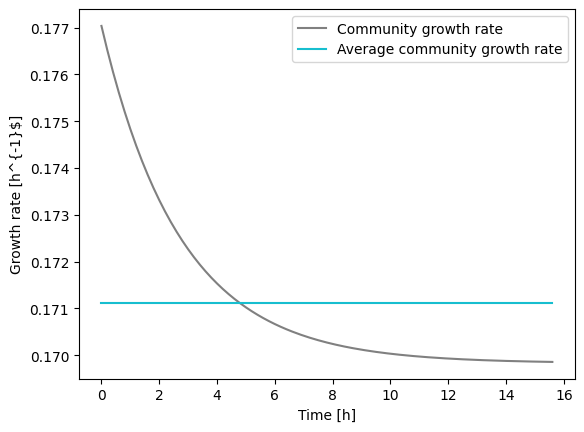

In [32]:
ls = dj_release.get_flux_values("X_comm") 

fls = [v / (biomasses["dleu"][i] + biomasses["dleu"][i]) for i, v in enumerate(ls)]

plt.plot(time_points[:-1], fls, color=f"grey", label=f"Community growth rate")
plt.plot(time_points[:-1], [sum(fls)/ len(fls)] * len(fls), color=f"C19", label=f"Average community growth rate")
plt.xlabel("Time [h]")
plt.ylabel(r'Growth rate [h^{-1}$]')
plt.legend()

<h3> Plot K:L ratio

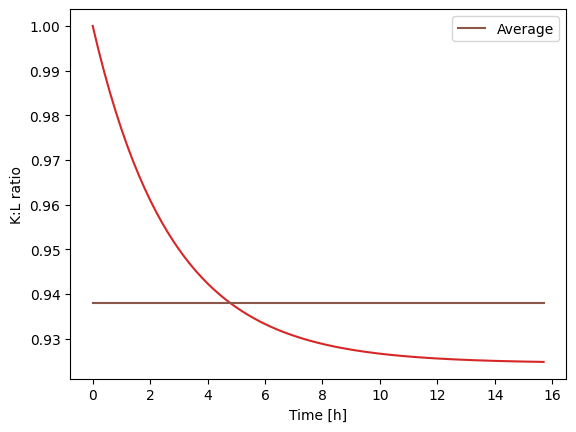

0.9248088561813589
0.937977782951455


In [39]:

fls = numpy.divide(biomasses["dlys"], biomasses["dleu"]).tolist()


plt.plot(time_points, fls, color=f"C{3}")
plt.plot(time_points, [sum(fls)/len(fls)] *(len(fls)), color=f"C{5}", label=f"Average")
plt.xlabel("Time [h]")
plt.ylabel("K:L ratio")
plt.legend()


plt.show()

print(fls[-1])
print(sum(fls)/len(fls))


<h2>Constrain uptake rates simulation </h2>

In [59]:
#Simulation settings:

#uptake simulation:
community_model.getReaction("R_LEUtex_dleu").setLowerBound(0.08)
community_model.getReaction("R_LEUtex_dleu").setUpperBound(0.08)

community_model.getReaction("R_LYStex_dleu").setLowerBound(-1000)
community_model.getReaction("R_LYStex_dleu").setUpperBound(0)


community_model.getReaction("R_LYStex_dlys").setLowerBound(0.06)
community_model.getReaction("R_LYStex_dlys").setUpperBound(0.06)

community_model.getReaction("R_LEUtex_dlys").setLowerBound(-1000)
community_model.getReaction("R_LEUtex_dlys").setUpperBound(0)



In [60]:
dj_uptake = DynamicJointFBA(
    community_model,
    [0.0027, 0.0027],
    {"M_glc__D_e": 11.96 , "M_leu__L_e": 0, "M_lys__L_e": 0},
)

getState1
Model clone time: 48.08483099937439

Reaction "X_comm" bounds set to: -INF <= X_comm <= INF
Add reagents with cmod.createReactionReagent(X_comm, metabolite, coefficient)
Adding objective: X_comm_objective
Objective X_comm_objective (idx=0) set active


In [61]:
dj_uptake.simulate(0.1, epsilon=0.00001, deviate=stop)

Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.15648102760314941


cplx_analyzeModel FBA --> LP time: 0.15748906135559082

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 8 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 6 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 674 rows and 1325 columns.
Aggregator did 1931 substitutions.
Reduced LP has 433 rows, 1210 columns, and 6202 nonzeros.
Presolve time = 0.01 sec. (7.49 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Scaled dual infeas =             1.000000
Iteration:    51   Dual objective     =             0.000951
Iteration:   112   Dual objective     =             0.000951
Perturbation started.
Iteration:   152   Dual objective     =             0.000951
Iteration:   214

CPLEX Error  1217: No solution exists.


INFO: Model is infeasible: 3
CPLEX Error  1217: No solution exists.
No solution available (status=infeasible) type: 0
Status: LPS_NONE
No solution available (status=infeasible) type: 0
No solution available (status=infeasible) type: 0

analyzeModel objective value: nan



In [64]:
metabolites = dj_uptake.get_metabolites()
biomasses = dj_uptake.get_biomasses()
time_points = dj_uptake.get_time_points()

<h3> Biomass plot


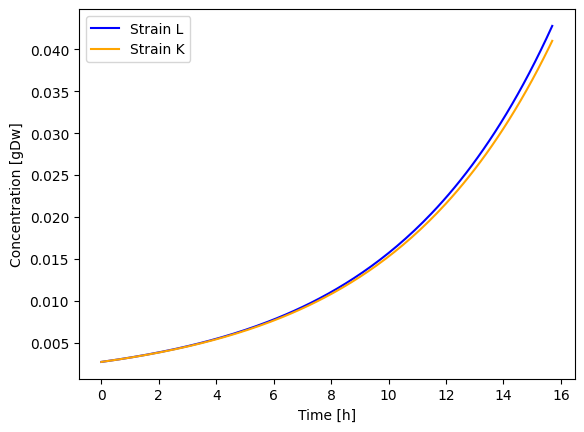

In [65]:
plt.plot(time_points, biomasses["dleu"], color="blue", label="Strain L")
plt.plot(time_points, biomasses["dlys"], color="orange", label="Strain K")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [gDw]")
plt.legend()
plt.show()


<sup>1</sup>Zhang, X. and Reed, J. L. (2014). Adaptive evolution of synthetic cooperating
communities improves growth performance. PLoS ONE, 9(10):e108297. https://doi.org/10.1371/journal.pone.0108297
